<a href="https://colab.research.google.com/github/uyminhtri2702/AI/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#them cac thu vien cho chuong trinh
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.backend import dropout
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
#Chia du lieu thanh 2 phan: phan huan luyen va phan test khai bao ca bien huan luyen va test
(x_train, y_train),(x_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 5s 0us/step


<function matplotlib.pyplot.show>

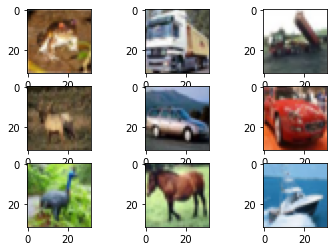

In [ ]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show

In [ ]:
# dinh dang kich thuoc cac tap du lieu 
x_train.shape , x_test .shape,  y_train.shape,  y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
#  x_train,x_test la mang 4 chieu nen chuhng ta phair chuyen sang dang mang 2 chieu 
x_train = x_train.reshape(50000,3072)  #32*32*3
x_test = x_test.reshape(10000,3072)    #32*32*3

# chuan hoa cac du lieu
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /= 255

# chuyen y thanh 10 lop va output la 10
y_train =np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
# tao mang neuron nhan tao
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5

In [ ]:
# huan luyen mo hinh
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=128, epochs=200 , verbose=1 , validation_split=0.2 , callbacks=[EarlyStopping(monitor='val_loss',patience=70)])

Epoch 1/200
313/313 [==============================] - 13s 38ms/step - loss: 2.1318 - accuracy: 0.2261 - val_loss: 1.8971 - val_accuracy: 0.3085
Epoch 2/200
313/313 [==============================] - 13s 43ms/step - loss: 1.9016 - accuracy: 0.3139 - val_loss: 1.8749 - val_accuracy: 0.3154
Epoch 3/200
313/313 [==============================] - 13s 41ms/step - loss: 1.8154 - accuracy: 0.3432 - val_loss: 1.7787 - val_accuracy: 0.3588
Epoch 4/200
313/313 [==============================] - 12s 37ms/step - loss: 1.7749 - accuracy: 0.3641 - val_loss: 1.8570 - val_accuracy: 0.3357
Epoch 5/200
313/313 [==============================] - 12s 38ms/step - loss: 1.7347 - accuracy: 0.3796 - val_loss: 1.7039 - val_accuracy: 0.3746
Epoch 6/200
313/313 [==============================] - 12s 38ms/step - loss: 1.7041 - accuracy: 0.3876 - val_loss: 1.7758 - val_accuracy: 0.3418
Epoch 7/200
313/313 [==============================] - 12s 38ms/step - loss: 1.6884 - accuracy: 0.3961 - val_loss: 1.6758 - val_ac

In [ ]:
# luu ket qua
from tensorflow.keras.models import load_model
model.save('tricifa10.h5')
load_model('tricifa10.h5')

In [ ]:
# danh gia do chinh xac mo hinh
score = model.evaluate(x_test,y_test,verbose=0)
print('Erro test is: ',score[0])
print('The test accuracy is: ',score[1])

Erro test is:  1.5406540632247925
The test accuracy is:  0.4578999876976013


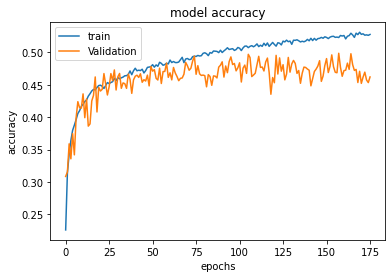

In [ ]:
# ve lai qua trinh hoc tu huan luyen
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [ ]:
# kiem tra ket qua mo hinh
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
filename = 'bird.jpg'
img = load_img(filename, target_size =(32,32))
img.show(filename)
img = img_to_array(img)
img = img.astype('float32')
img = img/255
img=img.reshape(1,32*32*3)
np.argmax (model.predict(img) , axis =-1)

array([5])